#1. PoC: itération 0

##1.1 EDA : Exploratory Data Analysis

But :
  - Fouille dans les données
  - Estimer la qualité des données
  - Tester des graphes (utile pour la suite)
  - mieux comprendre les données

In [4]:
# Je charge le package pandas et je lui donne le nom pd
import pandas as pd

In [5]:
# Je regarde où je suis dans l'arborescence (! pour pouvoir mettre des commandes linux)
!ls .

'ls' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [6]:
# Je charge les données dans la variable df
df = pd.read_csv('train.csv')

In [7]:
# Je regarde les colonnes disponibles (en parallèle je regarde attentivement la datacard dans kaggle pour bien comprendre le sens derrière les abbréviations)
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [8]:
# Je jette un coup d'oeil sur mes données
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Quelques stats /!\ la fonction ne montre que les colonnes numériques
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Je regarde le nombre de lignes/colonnes
df.shape

(891, 12)

<Axes: >

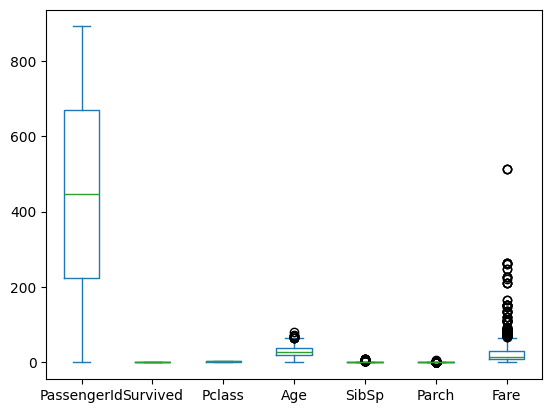

In [11]:
# J'affiche les boîtes à moustache et j'essaie de les comprendre
df.plot.box()

In [12]:
# PassengerId n'a aucun sens, pire, il pourrait permettre à l'algo d'apprendre par coeur les données si on le laisse : je le supprime
df1 = df.drop(['PassengerId'], axis=1)

<Axes: >

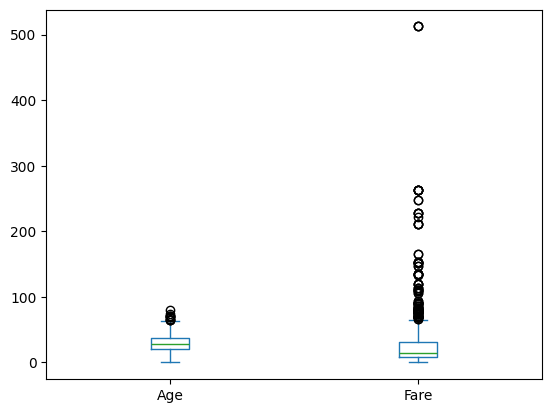

In [13]:
# Les boîtes à moustache de Fare et Age présentent beaucoup d'anomalies : il faut les justifier
# Je les affiche en plus gros
df1[['Age', 'Fare']].plot.box()

# Age est une variable non centrée, non négative, il peut paraître normal qu'elle ne suive pas une loi statistique pour les valeur hautes.

<Axes: ylabel='Frequency'>

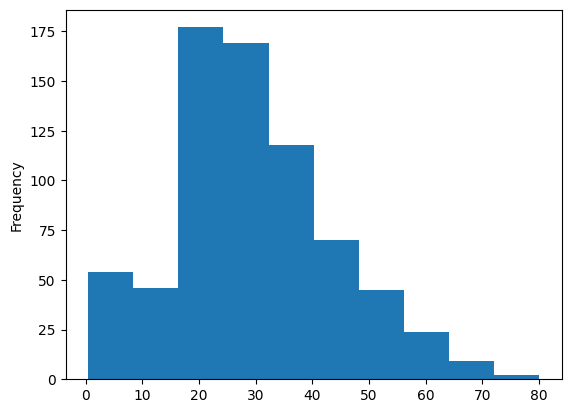

In [14]:
df.Age.plot.hist()
# De plus les valeurs ne semblent pas aberrantes

<Axes: ylabel='Frequency'>

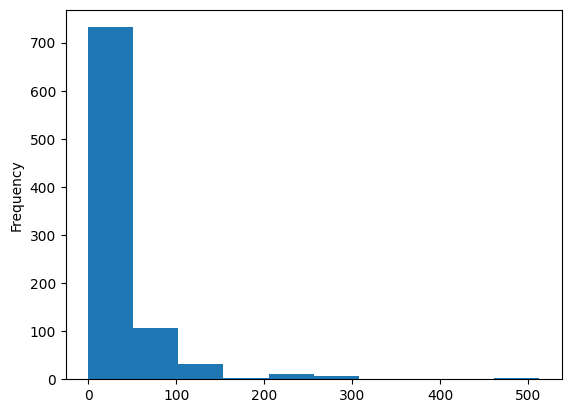

In [15]:
df.Fare.plot.hist()
# 3 classes de billets mais grosse variabilité des prix : bizarre, il faudra creuser plus tard

<Axes: xlabel='Age', ylabel='Fare'>

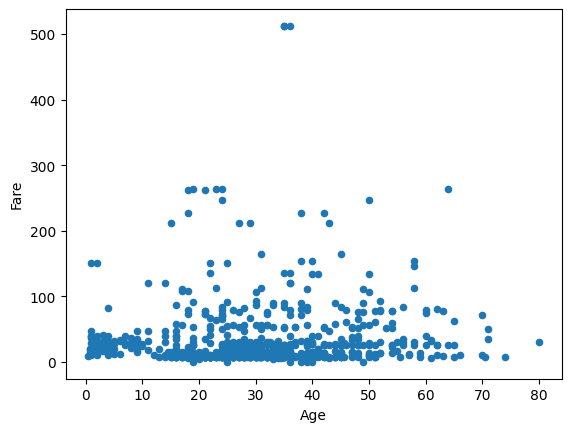

In [16]:
# Exemple d'affichage de points avec pandas
df1.plot.scatter(x="Age", y="Fare")

In [17]:
# Exemple avec Plotly (couleur + zoom possible)

import plotly.express as px

fig = px.scatter(df1, x="Age", y="Fare", color="Survived")
fig.show()

In [18]:
# Je veux vérifier l'effet "les femmes et les enfants d'abord"
display(px.scatter(df1[df1.Sex == 'female'], x="Age", y="Fare", color="Survived"))
display(px.scatter(df1[df1.Sex == 'male'], x="Age", y="Fare", color="Survived"))
# Que je valide

In [19]:
# Autre manière de faire
px.histogram(df1, x="Sex", color="Survived")

In [20]:
# Rapport entre le port d'embarquement et la survie : peu d'impact pour S et Q, plus pour C
px.histogram(df1, x="Embarked", color="Survived")

##1.2 Conclusion

Ici je mets une fonction de préparation des données.
Dans cette première itération, ce n'est pas très compliqué puisque je vais simplement enlever toutes les colonnes qui ne me satisfont pas, sans chercher à les modifier.

In [21]:
def data_preparation_0(df):
    df1 = df.drop(['PassengerId'], axis=1)
    df1.drop(['Cabin', 'Embarked', 'Name', 'Ticket', 'SibSp', 'Parch'], axis=1, inplace=True)
    return df1

In [22]:
# Je vérifie le tableau généré
df_train = data_preparation_0(df)
df_train.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


# Recensement pour le nettoyage

In [23]:
# Check des types de données
df_train.dtypes
# /!\ j'ai des numeric et j'ai des objects, mais par contre pas de dates
# Il faudra encoder les objects

Survived      int64
Pclass        int64
Sex          object
Age         float64
Fare        float64
dtype: object

In [24]:
# Valeurs manquantes ?
df_train.isnull().sum()
# oui, il faudra les gérer

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

# 2. Utilisation des pipelines pour le préprocessing

## Etape 1 : sélectionner les données selon leur type

source: https://scikit-learn.org/dev/auto_examples/ensemble/plot_stack_predictors.html#sphx-glr-auto-examples-ensemble-plot-stack-predictors-py


In [25]:
from sklearn.compose import make_column_selector
import numpy as np

cat_selector = make_column_selector(dtype_include=object)
num_selector = make_column_selector(dtype_include=np.number)

In [26]:
# Je teste pour les catégories
display(cat_selector(df_train))
# Je teste pour les numeric
display(num_selector(df_train))
# Pas mal !

['Sex']

['Survived', 'Pclass', 'Age', 'Fare']

## Etape 2 : je fais des preprocessing pour mes valeurs selon les types

In [27]:

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder

# Pour les "objects", je les encode avec l'ordinal encoder (= chaque catégorie va devenir un nombre)
cat_tree_processor = OrdinalEncoder(
    handle_unknown="use_encoded_value",
    unknown_value=-1,
    encoded_missing_value=-2,
)

# Pour les "numeric" je choisis de remplacer les valeurs absentes par la moyenne
num_tree_processor = SimpleImputer(strategy="mean", add_indicator=True)


In [28]:
from sklearn.compose import make_column_transformer

# J'assemble le tout pour faire une première pipeline de preprocessing et j'affiche le résumé
tree_preprocessor = make_column_transformer(
    (num_tree_processor, num_selector), (cat_tree_processor, cat_selector)
)

tree_preprocessor

ColumnTransformer(transformers=[('simpleimputer',
                                 SimpleImputer(add_indicator=True),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000020973C67DD0>),
                                ('ordinalencoder',
                                 OrdinalEncoder(encoded_missing_value=-2,
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000020973C67D10>)])

# 3. Je prépare mes données pour l'entrainement

In [29]:
from sklearn.model_selection import train_test_split

y = df_train.Survived
X = df_train.drop(['Survived'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 4. Partie ML : je rajoute un ou plusieurs modèle au bout de ma pipeline

In [30]:
from sklearn.ensemble import RandomForestRegressor

rfr_pipeline = make_pipeline(tree_preprocessor, RandomForestRegressor(n_estimators=100, random_state=42))
rfr_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(add_indicator=True),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000020973C67DD0>),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(encoded_missing_value=-2,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000020973C67D10>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [31]:
rfr_pipeline = rfr_pipeline.fit(X_train, y_train)

In [32]:
print("Train score", rfr_pipeline.score(X_train, y_train) *100)
print("Test score", rfr_pipeline.score(X_test, y_test) * 100)

Train score 87.1564619612917
Test score 37.73352407762338


Pas terrible : le modèle apprend par coeur les données et ne comprend pas. Erreur de variance ou "overfitting" ou "surapprentissage".

==> Je tente un 2e modèle linéaire cette fois

In [33]:
from sklearn.linear_model import LassoCV

lasso_pipeline = make_pipeline(tree_preprocessor, LassoCV())
lasso_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(add_indicator=True),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000020973C67DD0>),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(encoded_missing_value=-2,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000020973C67D10>)])),
                ('lassocv', LassoCV())])

In [34]:
lasso_pipeline = lasso_pipeline.fit(X_train, y_train)

In [35]:
print("Train score", lasso_pipeline.score(X_train, y_train) *100)
print("Test score", lasso_pipeline.score(X_test, y_test) * 100)

Train score 34.753414326447576
Test score 43.66396156268261


J'essaie de lui préparer les données différemment

In [36]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

cat_linear_processor = OneHotEncoder(handle_unknown="ignore")
num_linear_processor = make_pipeline(
    StandardScaler(), SimpleImputer(strategy="mean", add_indicator=True)
)

linear_preprocessor = make_column_transformer(
    (num_linear_processor, num_selector), (cat_linear_processor, cat_selector)
)
linear_preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('simpleimputer',
                                                  SimpleImputer(add_indicator=True))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000020973C67DD0>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000020973C67D10>)])

In [37]:
lasso_pipeline = make_pipeline(linear_preprocessor, LassoCV())
lasso_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(add_indicator=True))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000020973C67DD0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000020973C67D10>)])),
                ('lassocv', LassoCV())])

In [38]:
lasso_pipeline = lasso_pipeline.fit(X_train, y_train)

In [39]:
print("Train score", lasso_pipeline.score(X_train, y_train) *100)
print("Test score", lasso_pipeline.score(X_test, y_test) * 100)

Train score 34.83509853704252
Test score 43.723624498163005


J'essaie un modèle de classification

In [40]:
from sklearn.ensemble import RandomForestClassifier

rfc_pipeline = make_pipeline(tree_preprocessor, RandomForestClassifier(n_estimators=100, random_state=42))
rfc_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(add_indicator=True),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000020973C67DD0>),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(encoded_missing_value=-2,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000020973C67D10>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [41]:
rfc_pipeline = rfc_pipeline.fit(X_train, y_train)

In [42]:
print("Train score", rfc_pipeline.score(X_train, y_train) *100)
print("Test score", rfc_pipeline.score(X_test, y_test) * 100)

Train score 97.81879194630872
Test score 82.71186440677965


C'est mieux !

# 5. Outils de visualisation

Je reprends des graphes que j'aimais bien dans la première partie pour afficher les données du modèle et celles attendues

In [43]:
# Graphe données "vraies" (true)

df_graph_true = pd.concat([X_test, y_test], axis=1)
df_graph_true.head()
fig = px.scatter(df_graph_true, x="Age", y="Fare", color="Survived")
fig.show()

In [44]:
# Il faut que j'affiche des points Survived_predict
rfc_pipeline.predict(X_test)
# Problème les sorties ne sont pas un dataframe

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0])

In [45]:
y_predict = pd.DataFrame(rfc_pipeline.predict(X_test), columns=["Survived"])
y_predict.head()

,Survived
0,0
1,0
2,1
3,1
4,0


In [46]:
df_graph_predict = pd.concat([X_test.reset_index(drop=True), y_predict.reset_index(drop=True)], axis=1) #+ y-test + colonne erreur = y-test - y-predict
df_graph_predict.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,NaN,15.2458,0
1,2,male,31.0,10.5000,0
2,3,male,20.0,7.9250,1
3,2,female,6.0,33.0000,1
4,3,female,14.0,11.2417,0


In [47]:
# Problème: je veux des couleurs différentes pour les survived du predict: je vais mettre +2 pour avoir 2 et 3 au lieu de 0 et 1
df_graph_predict['Survived'] = df_graph_predict['Survived'] + 2
df_graph_predict.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,NaN,15.2458,2
1,2,male,31.0,10.5000,2
2,3,male,20.0,7.9250,3
3,2,female,6.0,33.0000,3
4,3,female,14.0,11.2417,2


In [48]:
# Je concatène les lignes
df_graph = pd.concat([df_graph_true, df_graph_predict])
df_graph.head()

,Pclass,Sex,Age,Fare,Survived
709,3,male,NaN,15.2458,1
439,2,male,31.0,10.5000,0
840,3,male,20.0,7.9250,0
720,2,female,6.0,33.0000,1
39,3,female,14.0,11.2417,1


In [49]:
# Je remets le graphe précédent
fig = px.scatter(df_graph, x="Age", y="Fare", color="Survived")
fig.show()

In [50]:
# On ne voit pas bien la différence. Je rajoute une colonne sur la provenance finalement


df_graph_predict = pd.concat([X_test.reset_index(drop=True), y_predict.reset_index(drop=True)], axis=1)
df_graph_predict['Survived'] = df_graph_predict['Survived']*2 + 1
df_graph_predict["predict_size"] = 1

df_graph_true = pd.concat([X_test, y_test], axis=1)
df_graph_true['Survived'] = df_graph_true['Survived']*2
df_graph_true["predict_size"] = 5

df_graph = pd.concat([df_graph_true, df_graph_predict])
df_graph.head()


# je veux écrire des labels en anglais plus clairs dans mon graphe
def map_survived(x):
  if x == 0:
    return "Dead_true"
  elif x == 1:
    return "Dead_predict"
  elif x == 2:
    return "Survived_true"
  elif x == 3:
    return "Survived_predict"

df_graph["color_label"] = df_graph["Survived"].map(map_survived)

fig = px.scatter(df_graph, x="Age", y="Fare", color="color_label", size="predict_size", opacity=.5, color_continuous_scale=px.colors.cyclical.IceFire)
fig.show()


# 2e itération

## Step data

Je souhaite travailler sur la colonne Fare pour chercher un prix par passager.
(je soupçonne que les prix sont groupés)

Pour ça je vais repérer s'il y a plusieurs passagers avec le même numéro de ticket

In [51]:
df1.Ticket.value_counts()

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64

Il y a bien des tickets de groupe

In [52]:
# sauvegarde au cas où
df2 = df1.copy()

In [53]:
df2["Fare_unit"] = df2["Fare"]/df2.groupby("Ticket")["Ticket"].transform("count")

<Axes: ylabel='Frequency'>

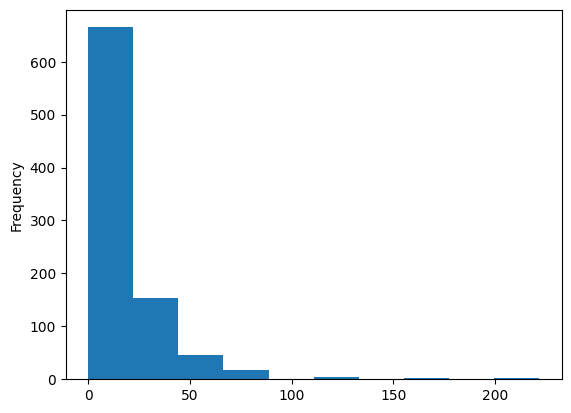

In [54]:
df2.Fare_unit.plot.hist()

C'est plus raisonnable. Voyons ces quelques billets > 100

In [55]:
df2[df2.Fare_unit > 100]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_unit
118,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,123.7604
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,170.7764
299,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,123.7604
311,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,131.1875
377,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C,211.5000
527,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,221.7792
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,170.7764
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,170.7764
742,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,131.1875


# Préparation des données

In [56]:
def data_preparation_1(df):
    df1 = df.drop(['PassengerId'], axis=1)
    df1.drop(['Cabin', 'Embarked', 'Name', 'SibSp', 'Parch'], axis=1, inplace=True)
    df1["Fare_unit"] = df1["Fare"]/df1.groupby("Ticket")["Ticket"].transform("count")
    df1.drop(['Fare'], axis=1, inplace=True)
    return df1

In [57]:
# Je vérifie le tableau généré
df_train = data_preparation_1(df)
df_train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare_unit
0,0,3,male,22.0,A/5 21171,7.2500
1,1,1,female,38.0,PC 17599,71.2833
2,1,3,female,26.0,STON/O2. 3101282,7.9250
3,1,1,female,35.0,113803,26.5500
4,0,3,male,35.0,373450,8.0500


# 3. Je prépare mes données pour l'entrainement

In [58]:
from sklearn.model_selection import train_test_split

y = df_train.Survived
X = df_train.drop(['Survived'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# ML

Je rappelle mon modèle champion : rfc

In [59]:
rfc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(add_indicator=True),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000020973C67DD0>),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(encoded_missing_value=-2,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000020973C67D10>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [60]:
print(rfc_pipeline.score(X_train, y_train))
print(rfc_pipeline.score(X_test, y_test))

0.9983221476510067
0.6983050847457627


Raté ! C'était mieux avant !

# Bonus : chercher les meilleurs hyperparamètres

In [61]:
# prompt: create a pipeline with gridsearchcv

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 10, 20],
    'randomforestclassifier__min_samples_split': [2, 5, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(rfc_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('simpleimputer',
                                                                         SimpleImputer(add_indicator=True),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000020973C67DD0>),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(encoded_missing_value=-2,
                                                                                        handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000020973C67D10>)])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'randomforestclassifier__max_depth': [None, 10, 20],
                         'randomforestclassifier__min_samples_split': [2, 5,
                                                                       10],
                         'randomforestclassifier__n_estimators': [50, 100,
                                                                  200]},
             scoring='accuracy')

In [62]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
print("Test score:", best_model.score(X_test, y_test))

Best hyperparameters: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__n_estimators': 200}
Best score: 0.7483753501400561
Test score: 0.6983050847457627
